6.4 Machine Learning Part 1

This script contains the following:

1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis



1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path= r'C:\Users\nehma\OneDrive\Desktop\CF Project'

In [4]:
path

'C:\\Users\\nehma\\OneDrive\\Desktop\\CF Project'

In [5]:
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'merge_all_years.csv'))  

2.Data Cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Year', 'Happiness_rank',
       'Happiness_score', 'GDP_capita', 'Family', 'Life_expectancy', 'Freedom',
       'Gov_trust', 'Generosity', 'Dystopia_residual'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,0,Afghanistan,Southern Asia,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,1,Albania,Central and Eastern Europe,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,2,Algeria,Middle East and Northern Africa,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,3,Angola,Sub-Saharan Africa,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,4,Argentina,Latin America and Caribbean,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [8]:
# Dropping columns and creating data subset 
df = df.drop(['Unnamed: 0'], axis=1, errors='ignore')

In [9]:
df.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,Afghanistan,Southern Asia,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,Albania,Central and Eastern Europe,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,Algeria,Middle East and Northern Africa,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,Angola,Sub-Saharan Africa,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,Argentina,Latin America and Caribbean,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [10]:
df.shape

(782, 12)

Missing Values

In [11]:
# Check for missing values

df.isnull().sum()


Country                0
Region                 0
Year                   0
Happiness_rank         0
Happiness_score        0
GDP_capita             0
Family                 0
Life_expectancy        0
Freedom                0
Gov_trust              1
Generosity             0
Dystopia_residual    312
dtype: int64

Duplicate Check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(782,)

Extreme Value Check

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

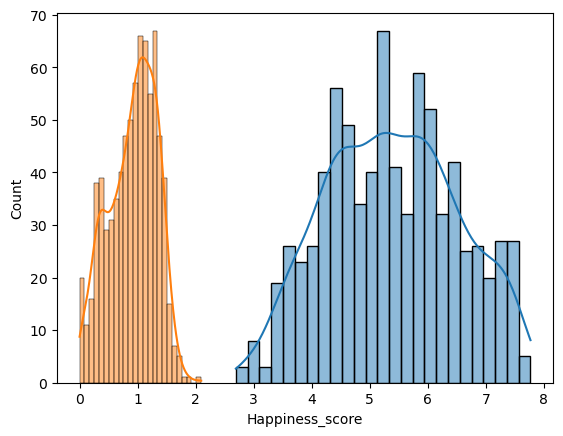

In [14]:
# Create a distribution plot for 'Life_Ladder'
scat1 = sns.histplot(df['Happiness_score'], bins=25, kde=True, label='Happiness_score')

# Create a distribution plot for 'Log_GDP_per_capita'
scat2 = sns.histplot(df['GDP_capita'], bins=25, kde=True, label='GDP_capita') # Shows extreme values


In [15]:
df['Happiness_score'].mean() # Check the mean

5.379017902998722

In [16]:
df['GDP_capita'].mean() # Check the mean

0.9160474824757033

In [17]:
df['Happiness_score'].median(), df['GDP_capita'].median()

(5.322, 0.982204709)

In [18]:
df['Happiness_score'].max(), df['GDP_capita'].max()

(7.769, 2.096)

3. Data prep for regression analysis

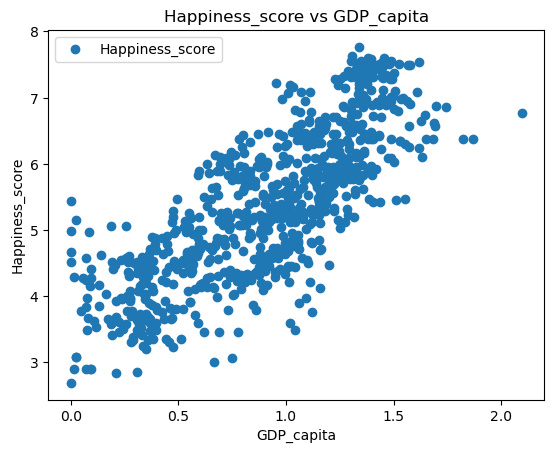

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'GDP_capita', y='Happiness_score' ,style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness_score vs GDP_capita')  
plt.xlabel('GDP_capita')  
plt.ylabel('Happiness_score')  
plt.show()

In [30]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'happ_vs_gdp.png'))

<Figure size 640x480 with 0 Axes>

Hypothesis 1: A country with elevated GDP per capita, a strong family score, and high life expectancy is likely to exhibit a correspondingly high happiness score.

Null Hypothesis 1: A country with elevated GDP per capita, a strong family score, and high life expectancy is not necessarily associated with a high happiness score.

In [ ]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['GDP_capita'].values.reshape(-1,1)
y = df['Happiness_score'].values.reshape(-1,1)

In [ ]:
X

In [ ]:
y

In [ ]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

4. Regression analysis

In [ ]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [ ]:
# Check if there are NaN values in the NumPy array
nan_indices = np.isnan(X_train)

# Fill NaN values with the mean (you can use other strategies as well)
X_train[nan_indices] = np.nanmean(X_train)

In [ ]:
# Check if there are NaN values in the NumPy array
nan_indices = np.isnan(X_test)

# Fill NaN values with the mean (you can use other strategies as well)
X_test[nan_indices] = np.nanmean(X_test)

In [ ]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

In [ ]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [ ]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP_capita vs Happiness_score (Test set)')
plot_test.xlabel('GDP_capita')
plot_test.ylabel('Happiness_score')
plot_test.show()

In [ ]:
print(np.isnan(y_test).any())
print(np.isnan(y_predicted).any())
#checking arrays to see if they contain NAN values

In [ ]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [ ]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

The linear regression model has yielded a positive slope of approximately 2.2055, indicating a direct and positive relationship between  GDP per capita and happiness scores. The relatively low Mean Squared Error (MSE) of about 0.4645 suggests that the model's predictions closely align with the actual values on average. Furthermore, the R2 score of 0.621 indicates that the model explains approximately 62.1% of the variability in happiness scores, reflecting a moderate level of predictive accuracy.

In [ ]:
y_predicted

In [ ]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Compare how the regression fits the training set

In [ ]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [ ]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [ ]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

a positive slope of approximately 2.2055, implying a direct and positive relationship between  GDP per capita and happiness scores. The Mean Squared Error (MSE) is relatively low at about 0.4851, indicating that the model's predictions are, on average, close to the actual values. Additionally, the R2 score is 0.6232, signifying that approximately 62.3% of the variability in happiness scores can be explained by the model. 

In [ ]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP_capita vs Happiness_score (Train set)')
plot_test.xlabel('GDP_capita')
plot_test.ylabel('Happiness_score')
plot_test.show()

Comaparision:
Both sets of results show a positive slope, indicating a positive relationship between GDP per capita and happiness scores. The mean squared errors are relatively close, with the first set having a slightly lower MSE (0.4645) compared to the second set (0.4851). The R2 scores are also similar, with the second set having a slightly higher R2 score (0.6232) compared to the first set (0.621).


In [ ]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merge_all_years1.csv'))